
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [1]:

import numpy as np
import matplotlib.pyplot as plt


In [2]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it
class StandardScalerManual:
    def fit(self, X):
        self.mean=np.mean(X,axis=0)     #mean and standard deviation for each feature
        self.std=np.std(X,axis=0)
        self.std[self.std==0]=1.0

    def transform(self, X):
        return (X-self.mean)/self.std   #standardizing features

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


In [11]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr=lr
        self.epochs=epochs
        self.l2_lambda=l2_lambda
        self.weights=None
        self.bias=None
        self.loss_history=[]

    def fit(self, X, y):    #we train the model using gradient descent
        n_samples,n_features=X.shape
        self.weights=np.zeros(n_features)
        self.bias=0  #we initialise weights and bias

        for i in range(self.epochs):
            y_predicted=np.dot(X,self.weights)+self.bias
            #loss (MSE+L2)
            mse_loss=np.mean((y-y_predicted)**2)
            l2_penalty=self.l2_lambda*np.sum(self.weights**2)
            self.loss_history.append(mse_loss+l2_penalty)
            #derivatives for gradient
            dw=(1/n_samples)*(2*np.dot(X.T,(y_predicted-y))+2*self.l2_lambda*self.weights)
            db=(1/n_samples)*2*np.sum(y_predicted-y)

            self.weights-=self.lr*dw
            self.bias-=self.lr*db  #updating weights and biases

    def predict(self, X):
        return np.dot(X,self.weights)+self.bias


In [13]:
X=2*np.random.rand(100, 1)
y=4+3*X.flatten()+np.random.randn(100) #we generate values of X and y
scaler=StandardScalerManual()
X_scaled=scaler.fit_transform(X)
model=LinearRegressionManual(lr=0.1,epochs=100,l2_lambda=0.1) #then we train our model
model.fit(X_scaled,y)
predictions=model.predict(X_scaled)

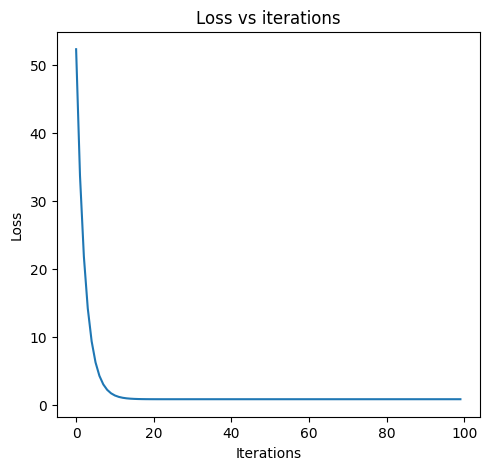

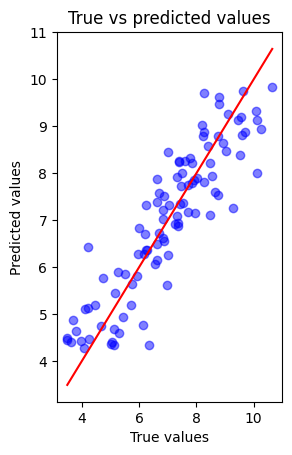

In [14]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(model.loss_history)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs iterations")
plt.show()
plt.subplot(1,2,2)
plt.scatter(y,predictions,color='blue',alpha=0.5)
plt.plot([min(y),max(y)],[min(y),max(y)],color='red')
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("True vs predicted values")
plt.show()


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [18]:

#Implement sigmoid function as told in the lectures
def sigmoid(z):
    z=np.clip(z,-500,500)
    return 1/(1+np.exp(-z)) #sigmoid function formula


In [21]:

#Implement Logistic Regression from scratch and here also add the regularizaation term
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr=lr
        self.epochs=epochs
        self.l2_lambda=l2_lambda
        self.weights=None
        self.bias=None
        self.loss_history=[]

    def fit(self, X, y):
        n_samples,n_features=X.shape
        self.weights=np.zeros(n_features)
        self.bias=0  #we initialise weights and biases

        for i in range(self.epochs):
            linear_model=np.dot(X,self.weights)+self.bias
            y_predicted=sigmoid(linear_model) #sigmomid function
            #calculating loss
            epsilon=1e-15
            loss=-np.mean(y*np.log(y_predicted+epsilon)+(1-y)*np.log(1-y_predicted+epsilon)) #binary cross entropy loss
            l2_penalty=self.l2_lambda*np.sum(self.weights**2)
            self.loss_history.append(loss+l2_penalty)
            #derivatives for gradient
            dw=(1/n_samples)*(np.dot(X.T,(y_predicted-y))+(2*self.l2_lambda*self.weights))
            db=(1/n_samples)*np.sum(y_predicted-y)

            self.weights-=self.lr*dw
            self.bias-=self.lr*db  #updating weights and biases


    def predict_proba(self, X):
        linear_model=np.dot(X,self.weights)+self.bias
        return sigmoid(linear_model) #probability

    def predict(self, X):
        y_predicted_proba=self.predict_proba(X)
        return [1 if i > 0.5 else 0 for i in y_predicted_proba] #we get 0 or 1 based on the value


In [24]:
np.random.seed(42)
class_0=np.random.randn(50,2)+np.array([1,1])
class_1=np.random.randn(50,2)+np.array([4,4])
X=np.vstack((class_0,class_1))
y=np.array([0]*50+[1]*50)  #we generate values of X and y
scaler=StandardScalerManual()
X_scaled=scaler.fit_transform(X)
model=LogisticRegressionManual(lr=0.1,epochs=500,l2_lambda=0.01) #then we train our model
model.fit(X_scaled,y)
predictions=model.predict(X_scaled)
accuracy=np.mean(predictions==y)

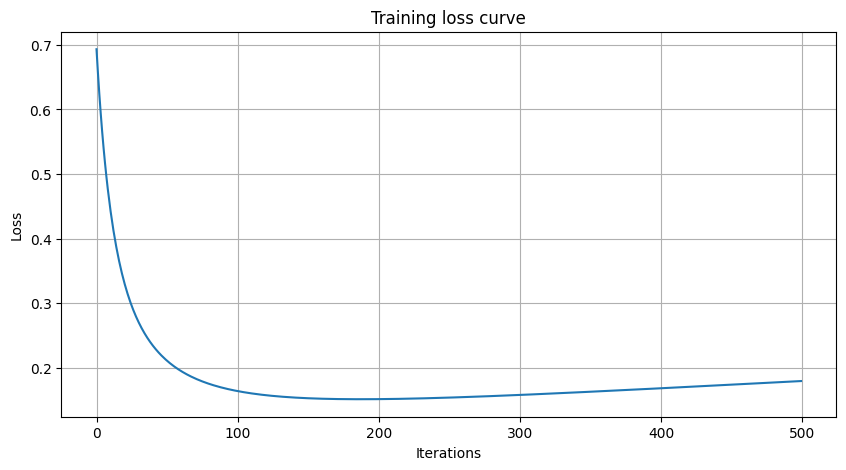

Final accuracy:100.0%


In [25]:
plt.figure(figsize=(10,5))
plt.plot(model.loss_history)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training loss curve")
plt.grid(True)
plt.show()
print(f"Final accuracy:{accuracy*100}%")


## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [30]:

# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT !
from sklearn.cluster import KMeans
def kmeans_matrix(M, k, max_iters=100):
    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''
    n,m=M.shape
    flat_M=M.reshape(-1,1)
    kmeans=KMeans(n_clusters=k,random_state=42,n_init='auto')
    kmeans.fit(flat_M)
    #assignment_table
    labels=kmeans.labels_
    assignment_table=labels.reshape(n, m)
    centroids=kmeans.cluster_centers_.flatten()

    #cookbook
    #we make the dict
    cookbook={cluster_id: [] for cluster_id in range(k)}
    for i in range(n):
        for j in range(m):
            label=assignment_table[i,j]
            cookbook[label].append((i,j))
    return assignment_table,cookbook,centroids


In [31]:
matrix_M=np.random.randint(0,100,(4,4)) #we create a random matrix
k_val=3
table,book,final_centers=kmeans_matrix(matrix_M,k_val)

In [32]:
print("Original matrix M\n")
print(matrix_M)
print("Final centroids\n")
print(final_centers)
print("Assignment table\n")
print(table)
print("Cookbook")
for cluster_id,coords in book.items():
    print(f"Cluster{cluster_id} (Center={final_centers[cluster_id]:.2f}):{coords}")

Original matrix M

[[59  6 56 35]
 [44 19 64  7]
 [15 13 75 86]
 [14 91 97 65]]
Final centroids

[12.33333333 87.25       53.83333333]
Assignment table

[[2 0 2 2]
 [2 0 2 0]
 [0 0 1 1]
 [0 1 1 2]]
Cookbook
Cluster0 (Center=12.33):[(0, 1), (1, 1), (1, 3), (2, 0), (2, 1), (3, 0)]
Cluster1 (Center=87.25):[(2, 2), (2, 3), (3, 1), (3, 2)]
Cluster2 (Center=53.83):[(0, 0), (0, 2), (0, 3), (1, 0), (1, 2), (3, 3)]



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
